In [1]:
import sys
sys.path.append("..") # lets you import from outer folder
from search import search_local # imports module within search folder

In [39]:
samples = search_local.search_phase_space(0, 0, 0, 0, 0, 0, epsilon = 0.3, v_scale = 0.1)

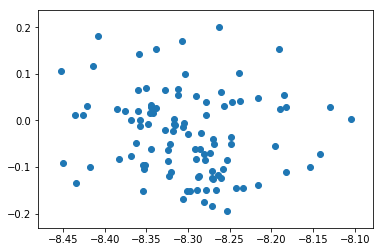

In [3]:
import matplotlib.pyplot as plt
plt.scatter(samples[:,0], samples[:,1])
plt.show()

In [12]:
from sklearn.cluster import MeanShift
my_meanshift = MeanShift(seeds = samples[:, :2], n_jobs = -1)

In [13]:
my_meanshift.fit(samples[:, :2])

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=-1,
     seeds=array([[-8.31156,  0.05533],
       [-8.3125 ,  0.06707],
       ...,
       [-8.25703,  0.03077],
       [-8.21642,  0.04737]]))

In [14]:
my_meanshift.cluster_centers_

array([[-8.31322742, -0.03927487]])

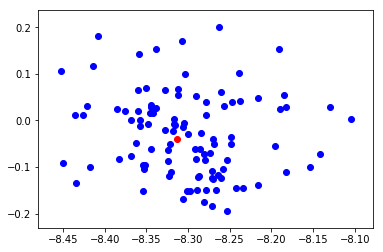

In [18]:
plt.scatter(samples[:,0], samples[:,1], c = 'blue')
plt.scatter(my_meanshift.cluster_centers_[:, 0],
            my_meanshift.cluster_centers_[:, 1], c = 'red')
plt.show()

lets put in a bandwidth!

In [29]:
my_meanshift_custom_bandwidth = MeanShift(bandwidth = 0.05, seeds = samples[:, :2], n_jobs = -1)

In [30]:
my_meanshift_custom_bandwidth.fit(samples[:, :2])

MeanShift(bandwidth=0.05, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=-1,
     seeds=array([[-8.31156,  0.05533],
       [-8.3125 ,  0.06707],
       ...,
       [-8.25703,  0.03077],
       [-8.21642,  0.04737]]))

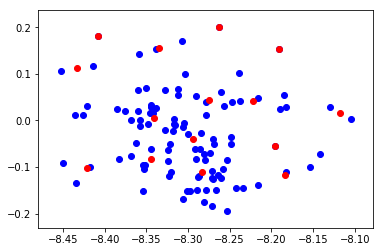

In [31]:
plt.scatter(samples[:,0], samples[:,1], c = 'blue')
plt.scatter(my_meanshift_custom_bandwidth.cluster_centers_[:, 0],
            my_meanshift_custom_bandwidth.cluster_centers_[:, 1], c = 'red')
plt.show()

what is happening?
the red points represent densities among blue points

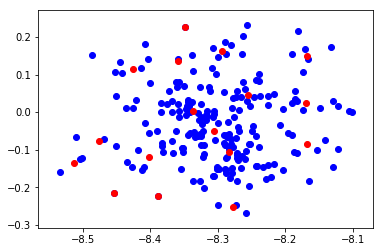

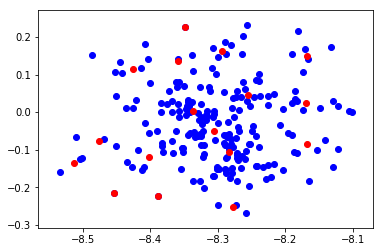

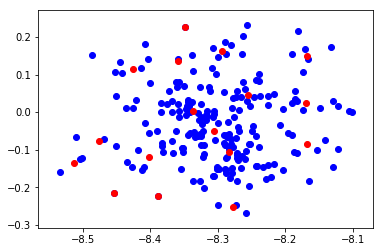

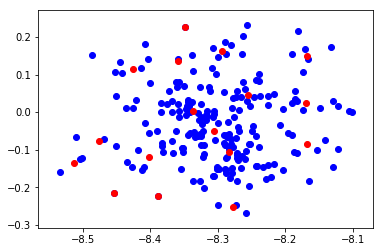

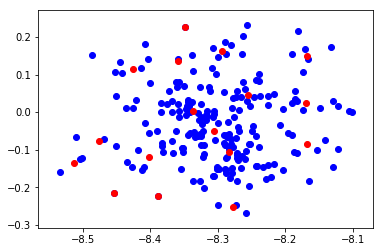

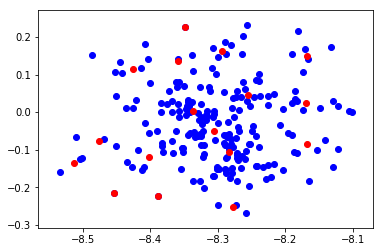

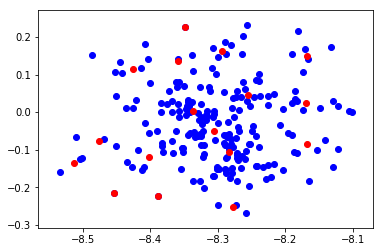

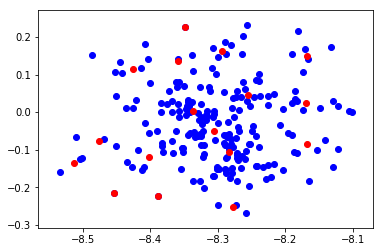

5.92 s ± 232 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [40]:
%%timeit
my_meanshift_custom_bandwidth = MeanShift(bandwidth = 0.05, seeds = samples[:, :2],n_jobs = -1)
my_meanshift_custom_bandwidth.fit(samples[:, :2])
plt.scatter(samples[:,0], samples[:,1], c = 'blue')
plt.scatter(my_meanshift_custom_bandwidth.cluster_centers_[:, 0],
            my_meanshift_custom_bandwidth.cluster_centers_[:, 1], c = 'red')
plt.show()

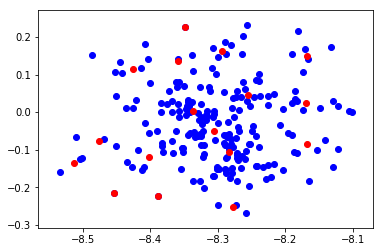

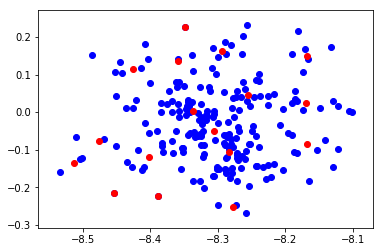

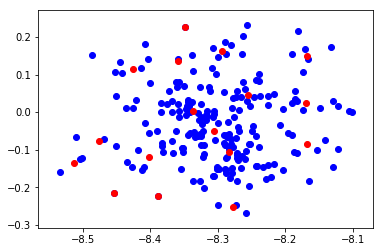

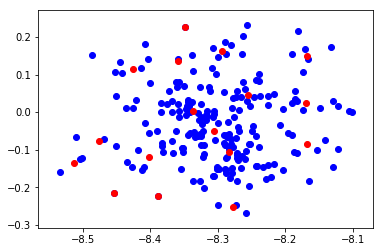

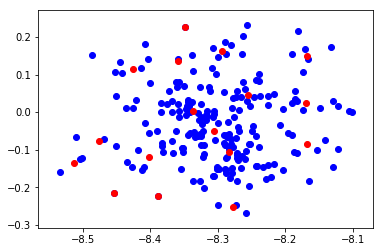

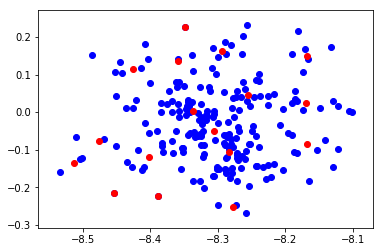

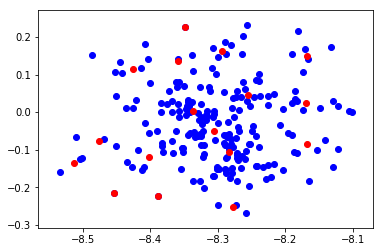

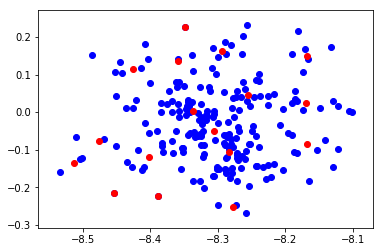

6 s ± 103 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [41]:
%%timeit
my_meanshift_custom_bandwidth = MeanShift(bandwidth = 0.05,n_jobs = -1)
my_meanshift_custom_bandwidth.fit(samples[:, :2])
plt.scatter(samples[:,0], samples[:,1], c = 'blue')
plt.scatter(my_meanshift_custom_bandwidth.cluster_centers_[:, 0],
            my_meanshift_custom_bandwidth.cluster_centers_[:, 1], c = 'red')
plt.show()